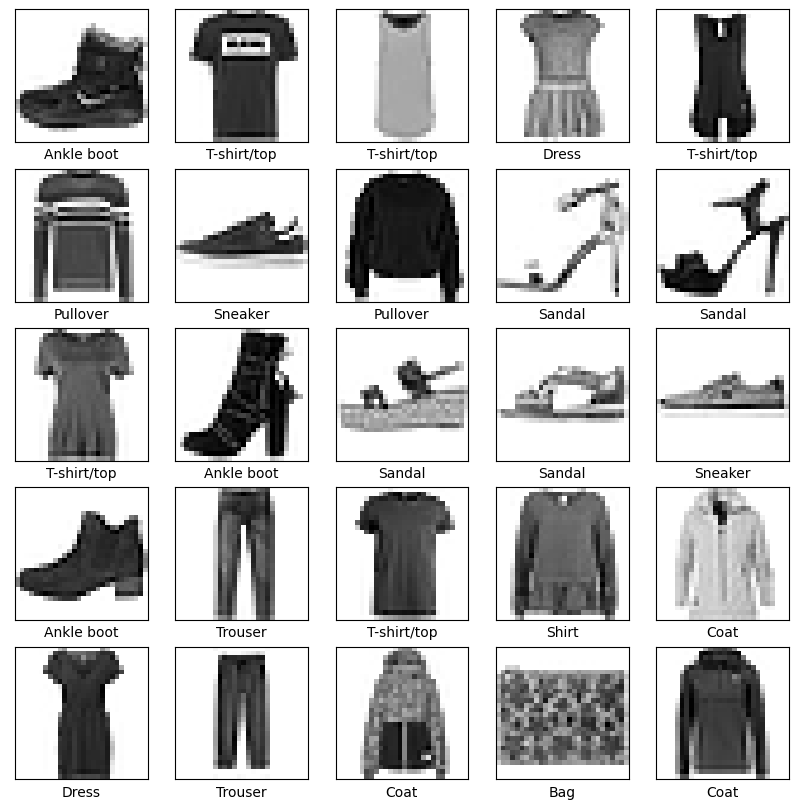

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist

# split data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# add names of image classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

# display a few of the datapoints
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [2]:

# define model layers.
#
# Flatten: converts 2D to 1D array
# Dense1: 128 nodes (neurons)
# Dense2: 10 classes (categories)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

# configure model settings
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# train model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5034 - accuracy: 0.8239
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3757 - accuracy: 0.8652
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3366 - accuracy: 0.8764
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3134 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2941 - accuracy: 0.8904
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2810 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2666 - accuracy: 0.9012
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2576 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2466 - accuracy: 0.9081
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.239

In [3]:
# See how we did
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 0s - loss: 0.3741 - accuracy: 0.8676 - 437ms/epoch - 1ms/step
Test accuracy: 0.8676000237464905


In [4]:

# Make preditions.
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
print(f"Predition: {predictions[0]}")

print(f"Highest Predition: {np.argmax(predictions[0])}")


313/313 [==============================] - 0s 894us/step
Predition: [9.5650637e-07 5.4762600e-10 3.9939260e-07 1.2307481e-07 4.1447386e-08
 7.1245231e-02 3.4582419e-07 1.1682126e-02 3.9095750e-05 9.1703159e-01]
Highest Predition: 9


In [5]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

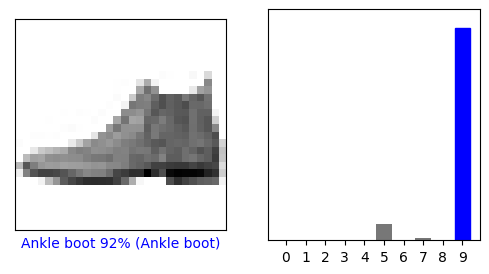

In [6]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

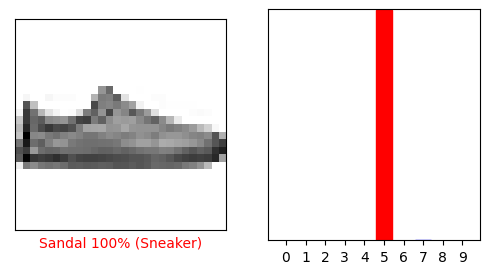

In [7]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

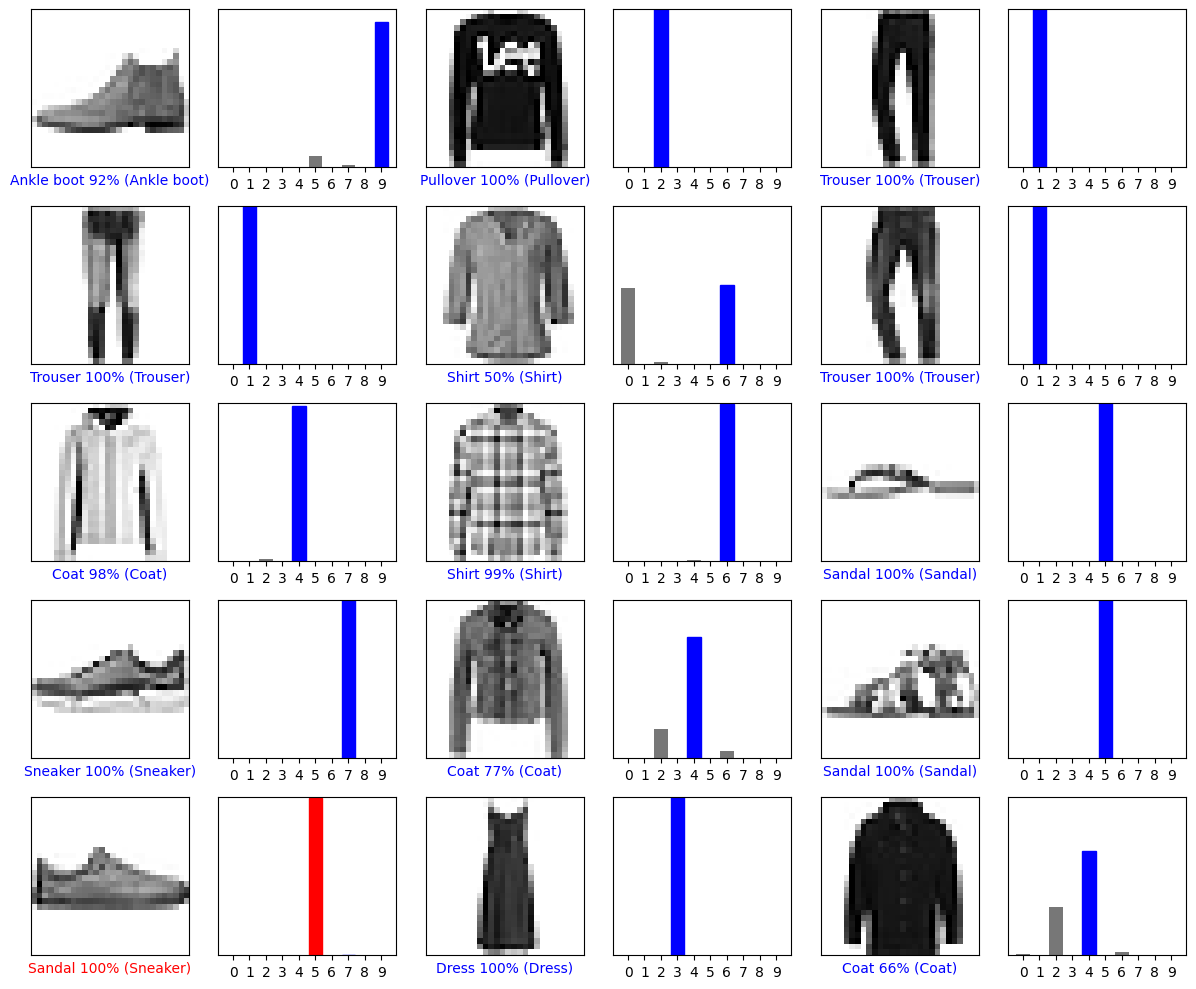

In [8]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

---------------- Using the model ----------------

In [9]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


1/1 [==============================] - 0s 25ms/step
[[5.80814449e-05 5.34853093e-14 9.99053180e-01 3.91548099e-10
  2.80208449e-04 1.87853118e-11 6.08633505e-04 4.45409773e-19
  1.02579924e-10 2.01365185e-15]]


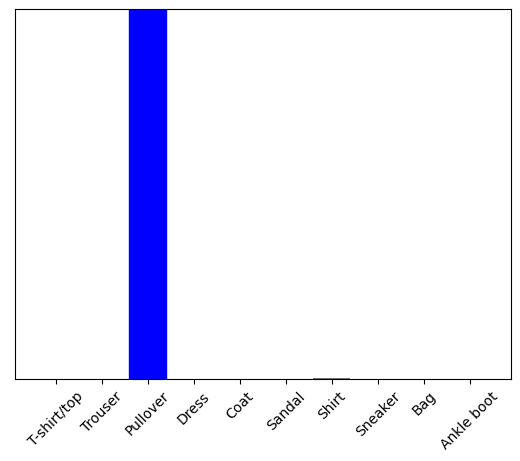

In [10]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

predictions_single = probability_model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()